   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

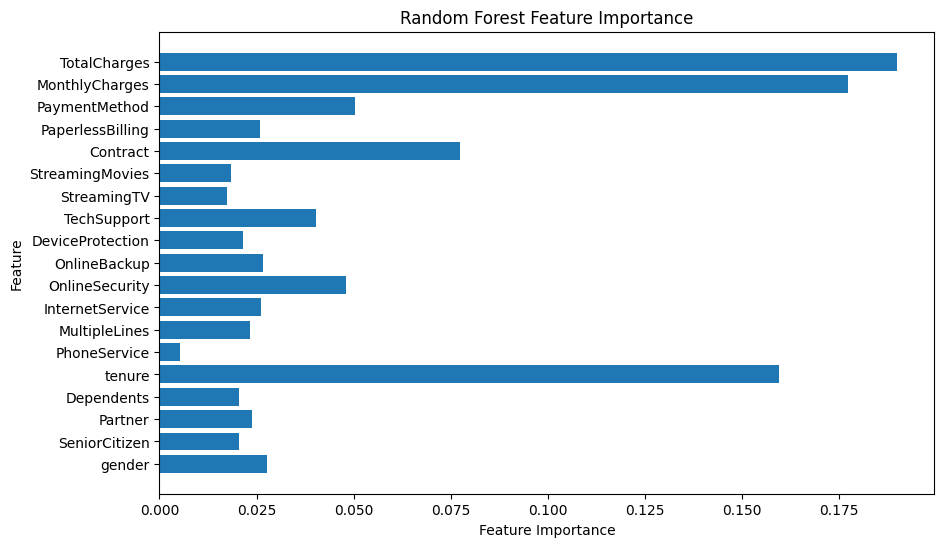


Custom Customer Churn Prediction: No


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())
print("\nDataset Shape:",df.shape)
print("\nMissing Values:\n",df.isnull().sum())
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
label_enc=LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if col !='customerID':
        df[col]=label_enc.fit_transform(df[col])
X=df.drop(['customerID','Churn'],axis=1)
y=df['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model=RandomForestClassifier(n_estimators=200,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("\n Accuracy:",accuracy_score(y_test,y_pred))
print("\n Classification Report:\n",classification_report(y_test,y_pred))
print("\n Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
importances=model.feature_importances_
feat_names=X.columns
plt.figure(figsize=(10,6))
plt.barh(feat_names,importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()
sample_customer=[X.iloc[0].values]
sample_pred=model.predict(sample_customer)
print("\nCustom Customer Churn Prediction:","Yes" if sample_pred[0]==1 else "No")
